In [1]:
from Scripts.model import *
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
IMG_SIZE = 16

In [3]:
def load_MNIST(data_transform, train=True):
    return torchvision.datasets.MNIST(
        "./Data/",
        download=True,
        train=train,
        transform=data_transform,
    )


def load_transformed_MNIST():
    data_transforms = [
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.ToTensor(),  # Scales data into [0,1]
        #transforms.RandomHorizontalFlip(),
        transforms.Lambda(lambda t: (t * 2) - 1)  # Scale between [-1, 1]
    ]

    data_transform = transforms.Compose(data_transforms)
    train_set = load_MNIST(data_transform, train=True)
    test_set = load_MNIST(data_transform, train=False)
    return torch.utils.data.ConcatDataset([train_set, test_set])

In [4]:
full_set = load_transformed_MNIST()

In [32]:
from torch.utils.data import DataLoader

dataloader = DataLoader(full_set, batch_size=64, shuffle=True)

In [33]:
start = 0.0001
end = 0.02
T = 100
B = torch.linspace(start, end, T)
A = 1 - B

In [34]:
A_bar = torch.cumprod(A, 0)

In [35]:
inv_A_bar = 1 - A_bar

In [36]:
full_set[0][0].shape

torch.Size([1, 16, 16])

In [37]:
def add_noise_to_image(img, t):

    reshape_inv_A_bar = inv_A_bar[t, None, None, None]
    reshape_A_bar = A_bar[t, None, None, None]
    noise = torch.sqrt(reshape_inv_A_bar)*torch.rand_like(img)
    noisy_img = img*torch.sqrt(reshape_A_bar) + noise

    return noisy_img, noise

In [38]:
full_set[0][0].shape

torch.Size([1, 16, 16])

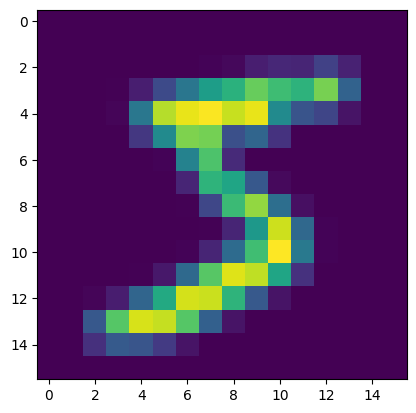

In [39]:
plt.imshow(full_set[0][0][0])

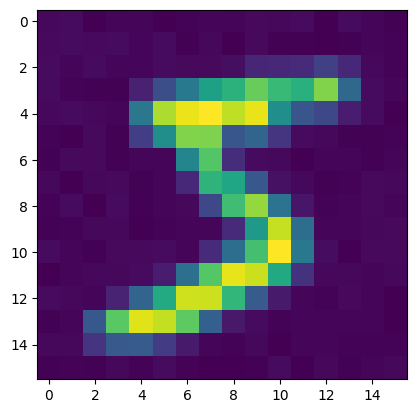

In [40]:
plt.imshow(add_noise_to_image(full_set[0][0], 5)[0][0])

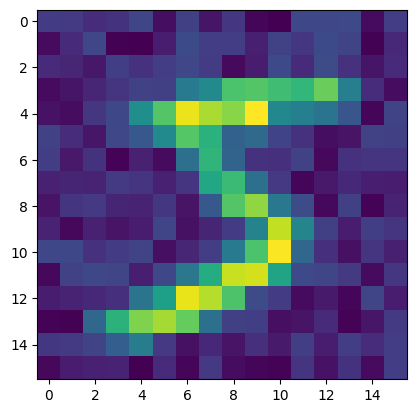

In [41]:
plt.imshow(add_noise_to_image(full_set[0][0], 50)[0][0])

In [42]:
EPOCHS = 1

In [43]:
model = UNet(1)
model = model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [44]:
70000/64

1093.75

In [45]:
i = 1

for epoch in range(EPOCHS):
    for (x_batch, _) in dataloader:
        print(f"{i} out of 1093")
        optimizer.zero_grad()
        rand_times = torch.randint(0, T, (x_batch.shape[0],))
        noisy_images, noise = add_noise_to_image(x_batch, rand_times)
        pred_noise = model(noisy_images)

        loss = F.mse_loss(noise, pred_noise)
        loss.backward()
        optimizer.step()
        i += 1

        print("current loss: ", loss.item())

1 out of 1093
current loss:  0.08923057466745377
2 out of 1093
current loss:  0.06548497825860977
3 out of 1093
current loss:  0.05233987420797348
4 out of 1093
current loss:  0.05228114873170853
5 out of 1093
current loss:  0.04819703847169876
6 out of 1093
current loss:  0.03396795317530632
7 out of 1093
current loss:  0.03638989478349686
8 out of 1093
current loss:  0.03321739286184311
9 out of 1093
current loss:  0.029472721740603447
10 out of 1093
current loss:  0.022937694564461708
11 out of 1093
current loss:  0.025120476260781288
12 out of 1093
current loss:  0.02547692321240902
13 out of 1093
current loss:  0.019302379339933395
14 out of 1093
current loss:  0.026904072612524033
15 out of 1093
current loss:  0.02127830684185028
16 out of 1093
current loss:  0.019053570926189423
17 out of 1093
current loss:  0.018496299162507057
18 out of 1093
current loss:  0.018772121518850327
19 out of 1093
current loss:  0.016425158828496933
20 out of 1093
current loss:  0.019194338470697403

In [46]:
noisy_img, noise = add_noise_to_image(full_set[0][0], 50)

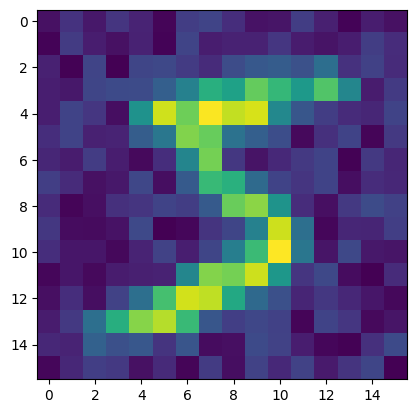

In [48]:
plt.imshow(noisy_img[0])

In [49]:
model = model.eval()

In [55]:
model(noisy_img.unsqueeze(0)).shape

torch.Size([1, 1, 16, 16])

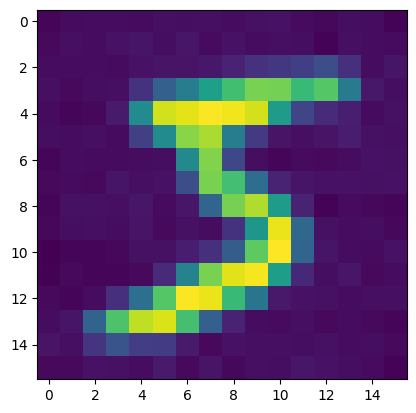

In [57]:
plt.imshow(noisy_img[0] - model(noisy_img.unsqueeze(0)).detach().numpy()[0][0])

In [26]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [28]:
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
else:
    print ("MPS device not found.")

In [29]:
mps_device

device(type='mps')

In [30]:
for x in dataloader:
    print(x)
    print(len(x))
    print(x[0].shape)
    print(x[1])
    break

[tensor([[[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9843,
           -0.6627, -0.0510,  0.1216, -0.5373, -0.9843, -1.0000, -1.0000,
           -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.7020,
            0.4039,  0.4588,  0.3647,  0.2078, -0.9451, -1.0000, -1.0000,
           -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.8902,  0.2549,
            0.3098, -0.7098, -0.725

In [2]:
x = torch.ones((1, 1, 128, 128))

In [3]:
net = UNet(1)

In [5]:
y = net(x)

In [7]:
y.shape

torch.Size([1, 1, 128, 128])

In [3]:
enc = EncoderBlock(1, 2, padding=1)
y = enc(x)

In [4]:
y

tensor([[[[4.0122, 4.4350, 4.4350,  ..., 4.4350, 4.4350, 3.5100],
          [2.1633, 0.0288, 0.0288,  ..., 0.0288, 0.0288, 0.0330],
          [2.1633, 0.0288, 0.0288,  ..., 0.0288, 0.0288, 0.0330],
          ...,
          [2.1633, 0.0288, 0.0288,  ..., 0.0288, 0.0288, 0.0330],
          [2.1633, 0.0288, 0.0288,  ..., 0.0288, 0.0288, 0.0330],
          [1.3420, 0.0790, 0.0790,  ..., 0.0790, 0.0790, 0.0532]],

         [[2.7642, 5.2036, 5.2036,  ..., 5.2036, 5.2036, 5.5992],
          [0.7336, 0.0086, 0.0086,  ..., 0.0086, 0.0086, 0.1252],
          [0.7336, 0.0086, 0.0086,  ..., 0.0086, 0.0086, 0.1252],
          ...,
          [0.7336, 0.0086, 0.0086,  ..., 0.0086, 0.0086, 0.1252],
          [0.7336, 0.0086, 0.0086,  ..., 0.0086, 0.0086, 0.1252],
          [1.4177, 0.1045, 0.1045,  ..., 0.1045, 0.1045, 0.1564]]]],
       grad_fn=<MaxPool2DWithIndicesBackward0>)

In [5]:
y.shape

torch.Size([1, 2, 32, 32])

In [6]:
dec = DecoderBlock(2, 1, transpose_stride=2, out_padding=1)

x = dec(y, y)

In [7]:
x

tensor([[[[ 3.0452, -3.1293,  6.1165,  ..., -6.9095,  1.1591, -3.6795],
          [-2.9322, -4.5297, -3.2377,  ..., -0.4525,  1.5788, -0.2614],
          [ 0.0979, -1.1171, -1.5505,  ...,  0.2066, -1.4356,  2.0224],
          ...,
          [-0.1107,  0.0540,  0.8798,  ...,  0.1280,  0.1068,  0.0890],
          [ 0.0979, -0.5197, -0.4706,  ...,  0.0992,  0.0919,  0.1047],
          [ 0.0979,  0.0979,  0.0979,  ...,  0.0979,  0.0979,  0.0979]]]],
       grad_fn=<NativeBatchNormBackward0>)

In [8]:
x.shape

torch.Size([1, 1, 66, 66])